## **SIMPLE LINEAR REGRESSION**

In given task we have to predict the percentage of marks expected by the student based upon the number of hours they studied.In this task only two variables are involved.


In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [23]:
# Reading the Data 
data = pd.read_csv('http://bit.ly/w-data')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Check if there any null value in the Dataset
data.isnull == True

False

Plotting a 2-D Graph Data points are been plotted on 2-D graph to eyeball dataset and see if we can manually find any relationship between the data.

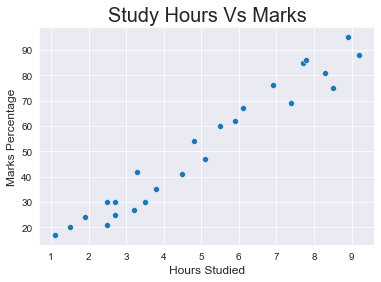

In [24]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Study Hours Vs Marks',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**From the graph above, it can be seen that there is a positive linear relation between the number of hours studied and percentage of score.**



**Preparing the data**

Now we will divide the data in two

In [6]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

## **Training the Algorithm**

The data has been split in two parts, now we will train our algorithm

In [7]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


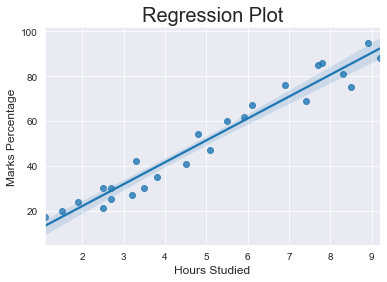

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [5]:
# Plotting the regression Line
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

### **Making Predictions**

Now our algorithm is trained, it's time to make some predictions.

In [8]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [9]:
# Comparing Actual vs Predicted
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


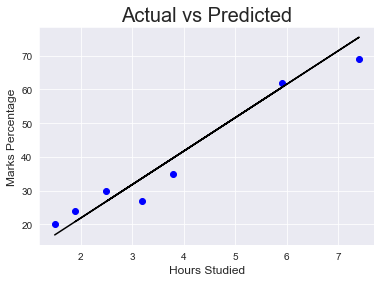

In [10]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [11]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


In [29]:
hours = [9.25]
answer = regression.predict([hours])
print("No of Hours ={}".format(hours))
print("Predicted Score = {}".format(round(answer[0],3)))

No of Hours =[9.25]
Predicted Score = 93.893


### **Evaluating the model**
In the final step we will evaluate the performance of our algorithm. For simplicity here, we have chosen the mean square error.

In [33]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(val_y, pred_y)) 

Mean Absolute Error: 4.130879918502486
